In [1]:
import numpy as np

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
test size 264
train size 2370
Contoh X_train = [[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]


(2370,)

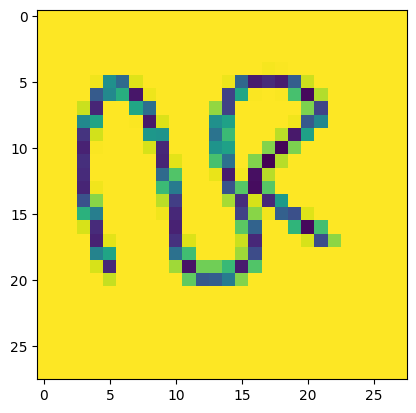

In [2]:
import load_gambar
train_images = load_gambar.X_data_train
print(train_images.shape)
train_label = np.array(load_gambar.Y_label)
train_label.shape

In [3]:
def outputShape(imgSize, kernelSize):
    numPixcel = 0
    for i in range(imgSize):
        added = i + kernelSize
        if added <= imgSize:
            numPixcel += 1
    return numPixcel
# outputShape(w, n)    

In [4]:
# Digunakan ketika ingin same padding 
# jadi misalnya menggunakan kernel 3 bisa di tambahin add_padng sebelum melakukan konv
def add_padding_with_kernel_size (kernel_size) :
    return kernel_size // 2

def add_image_with_padding (img, padding):
    img_with_padding = np.zeros(shape=(
        img.shape[0] + padding * 2,  # Multiply with two because we need padding on all sides
        img.shape[1] + padding * 2
    ))
    
    img_with_padding[padding:-padding, padding:-padding] = img
    
    return img_with_padding

In [5]:
wc1 = np.random.rand(2,3)
wf2 = np.random.rand(20, 169)
b = 1

In [6]:
def convolusi(img= np.array, kernel= np.array, bias= int, padding= ""):
    # ukuran kernel
    kernel_size = kernel.shape[0]
    # ukuran height, weigth array inputan gambar
    h, w = img.shape
    # jika meng-assign padding "SAME"
    if padding == "SAME" :
        # jumlah ukuran padding yang ditambahkan pada gambar
        add_padding_width = kernel_size//2
        # menginisiasi ukuran inputan atau array image baru 
        img_with_padding = np.zeros(shape = (h + add_padding_width * 2, w + add_padding_width * 2))
        # memasukkan value image kedalam inputan baru di daerah bukan padding
        img_with_padding[add_padding_width:-add_padding_width, add_padding_width:-add_padding_width] = img
        img = img_with_padding
    # jika meng-assign selain "SAME" maka padding adalah valid dan inputan tetap
    else :
        img = img
    # target adalah vaiable ukuran hasil konvolusi     
    target = outputShape(img.shape[0], kernel_size)
    # menginisiasi matriks output dari konvolusi
    output = np.zeros(shape=(target, target))
    for i in range(target):
        for j in range(target):
            # variable mat menjadi image region ketika proses iterasi
            mat = img[i:i+kernel_size, j:j+kernel_size]
            # perkalian matriks dilakukan dan menjumlahkan hasil kedalam peta fitur
            output[i,j] = np.sum(np.multiply(mat, kernel)) + bias
    # mengembalikan array hasil konvolusi, kernel, dan array image awal
    return output, kernel, bias, img

In [7]:
# convolusi buat back convolusi dengan kernel sudah berupa array
def convolusiBack(img= np.array, kernel= float, padding= ""):
    kernel_size = kernel.shape[0]
    h, w = img.shape
    if padding == "Same" :
        add_padding_width = kernel_size//2
        img_with_padding = np.zeros(shape = (h + add_padding_width * 2, w + add_padding_width * 2))
        img_with_padding[add_padding_width:-add_padding_width, add_padding_width:-add_padding_width] = img
        img = img_with_padding
#         print(img)
    else :
        img = img
        
    target = outputShape(img.shape[0], kernel_size)
    output = np.zeros(shape=(target, target))
    for i in range(target):
        for j in range(target):
            mat = img[i:i+kernel_size, j:j+kernel_size]
            output[i,j] = np.sum(np.multiply(mat, kernel))
#     print(output.shape)
    return output


In [8]:
# inputan output dari backMaxpooling
def backConvolusi(dz, w, b, inputan, lr=0.005):
    w = np.array(w)
    dz= np.array(dz)
    inputan = np.array(inputan)
    b = b
    dW = convolusiBack(inputan, dz, "no")
    w_rotate = np.rot90(w, 2)
    dX = convolusiBack(dz, w_rotate, "Same")
    dB = np.sum(dz) + b
    wUpdate = w - lr*dW
    inputUpdate = inputan -lr*dX
    bUpdate = b -lr*dB
    
    
    return wUpdate, bUpdate, inputUpdate

In [9]:
def reLu(arr):
    length_row, length_column = arr.shape
    for row in range(length_row):
        for column in range(length_column):
            # jadikan nila 0, jika nilai dalam array < 0
            if arr[row, column] < 0:
                arr[row, column] = 0
    return arr

In [10]:
def maxPooling(arr, stride=int, pool_size=int):
    arr = np.array(arr)
    w, h = arr.shape
    new_array = []
    output =[]
    for i in np.arange(w, step= stride):
        for j in np.arange(h, step = stride):
            mat = arr[i:i+pool_size, j:j+pool_size]
            if mat.shape == (pool_size, pool_size):
                new_array.append(mat)
    new_array = np.array(new_array)
    output_pooling_shape = (int(np.sqrt(new_array.shape[0])), int(np.sqrt(new_array.shape[0])))
    for pool in new_array :
        output.append(np.max(pool))
    return np.array(output).reshape(output_pooling_shape)


In [11]:
# inputan hasil dari relo, output buat relu juga
def backMaxPooling(array_awal, stride, pool_size):
    
    arr = np.array(array_awal)
#     print(arr)
    w, h = arr.shape
    new_array = []
    output =[]
    for i in np.arange(w, step= stride):
        for j in np.arange(h, step = stride):
            mat = arr[i:i+pool_size, j:j+pool_size]
#             print(mat)
            if mat.shape == (pool_size, pool_size):
                valueMax = np.max(mat)
                for k in range(mat.shape[0]):
                    for l in range(mat.shape[0]):
                        if mat[k,l] != valueMax :
                            mat[k,l] = 0
                        elif mat[k,l] == valueMax :
                            mat[k,l] = 1
                        else :
                            mat[k,l] = 0
                            
                        
    return arr

In [117]:
def flat(arr):
    array_flattern = arr.flatten()
#     print (array_flattern.shape)
    return np.array(array_flattern)


def hidden_layer(arr, weights, bias) :
     
    output=[]
    arr = np.array(arr)
#     print(arr.shape)
    totals = np.dot(weights, arr) + bias
    return totals, weights, bias


def softmax(totals):
    totals = np.array(totals)
    exp = np.exp(totals)
    return exp /np.sum(exp)

#     exp = np.exp(totals)
#     output = exp / np.sum(exp, axis=0)
#     return output



In [118]:
# def backprop1 (fc1, gradient):
#     t_exp = np.exp(fc1)
#     # Sum of all e^totals
#     S = np.sum(t_exp)
#     gradient = np.array(gradient)
#     for i, grad in enumerate(gradient):
#         if grad == 0:
#             continue
        
#         d_out_d_t = -t_exp[i] * t_exp / (S ** 2)
#         d_out_d_t[i] = t_exp[i] * (S - t_exp[i]) / (S ** 2)
#         d_L_d_t = grad * d_out_d_t
# #         print(d_L_d_t)
        
#     return d_L_d_t

def backprop1 (softmax, label):
    
    return softmax-label


In [119]:
#w1, b1 itu dari fc
def backprop2(backprop1, w1, b1, flattening, lr= 0.0005):
#     nanti dituker
    inputan = np.array(flattening)
    weight = np.array(w1)
    bias = 1
    d_input = inputan[np.newaxis].T @ backprop1[np.newaxis]
    d_weight =  backprop1 @ weight
    d_bias = backprop1 * bias
    w1 -= lr * d_weight
    b1 -= lr * d_bias
    return w1, b1
    
    

In [120]:
def feed2 (image, label,weightC1, biasc1, weightF1, biasF, weightF2, biasF2 ):
    conv1, wc1, b1, X1 = convolusi(
                            image, 
                            weightC1,  
                            biasc1,  
                            "no")
    maxPool = maxPooling(conv1,2,2)
    flattening = flat(maxPool)
    fc1, wf1, bf1 = hidden_layer(flattening,weightF1, biasF)
#     print(fc1)
#     fc2, wf2, bf2 = hidden_layer(fc1 ,weightF2, biasF2)
    out = softmax(fc1)
    loss = -np.log(out[label])
    acc = 1 if np.argmax(out) == label else 0
    return wc1, b1, X1, fc1, wf1, bf1, flattening, conv1, acc, loss, out, label
    
            
def train (image, label,weightC1, biasc1, weightF1, weightF2, biasF2 ) :
    wc1, b1, X1, fc1, wf1, bf1, flattening, conv1, acc, loss, out, label= feed2(
                                image, 
                                label, 
                                weightC1, 
                                biasc1,  
                                weightF1, 
                                biasF,  
                                weightF2, 
                                biasF2)
    dout = np.zeros(20)
    dout[label] = -1 / out[label]
    dSoftmax = backprop1(out, label)
    weightF2_update, biasF2_update  = backprop2(dSoftmax, wf1, bf1, fc1, lr= 0.0005)
#     print("ini update f2", weightF2_update.shape)
#     weightF_update, biasF_update  = backprop2(fc2, wf1, bf1, flattening, lr= 0.0005)
    
    Z = backMaxPooling(conv1, 2, 2)
    weightC1, biasC1, image = backConvolusi(Z, wc1, b1, X1, lr=0.005)
    
    return weightC1,biasC1, image, weightF2_update, biasF2_update, loss, acc, label, out

In [121]:
weightC1 = np.random.randn(2, 2) / 9 -0.5
weightF1 = np.round(np.random.randn(20, 169)- 0.5, 3)
weightF2 = np.random.randn(20,20) / 9 -0.5
biasC2 = 1 - 0.5
bias = 1 - 0.5
biasc1 = 1 - 0.5
biasF2 = 1 - 0.5
biasF = 1 - 0.5

In [124]:
all_loss = []
all_acc = []
# Train the CNN for 2 epochs
for epoch in range(4):
  print('--- Epoch %d ---' % (epoch + 1))

# #   Shuffle the training data
#   permutation = np.random.permutation(len(train_images))
#   train_images = train_images[permutation]
#   train_labels = train_label[permutation]

  # Train!
  list_loss = []
  list_accuracy = []
  loss = 0
  num_correct = 0
  for i, (im, label) in enumerate(zip(train_images, train_label)):
#     print("image ke %d, epoch ke%d" % (i, epoch))
    im = (im / 255) - 0.5
    if i % 100 == 99:
      num_correct = (num_correct/100)*100
      print(
        '[Step %d] Past 400 steps: Average Loss %.3f | Accuracy: %d%% | ' %
        (i + 1, loss / 100, 20+num_correct) 
      )
      list_loss.append(loss / 100)
      list_accuracy.append(num_correct)
      loss = 0
      num_correct = 0

    weightC1,biasc1, im, weightF1, biasF1, l, acc, label,out = train(im, label,weightC1, biasc1, weightF1, weightF2, biasF2 )
    loss += l
    num_correct = num_correct + acc
  all_loss.append(list_loss)
  all_acc.append(list_accuracy)
  # print('Time per Epoch : ', str((time.time() - waktuEpoch) / 60), ' minute')
  print("Akurasi per epoch : ", np.mean(list_accuracy), "%")


--- Epoch 1 ---
[Step 100] Past 400 steps: Average Loss nan | Accuracy: 27% | 
[Step 200] Past 400 steps: Average Loss nan | Accuracy: 23% | 
[Step 300] Past 400 steps: Average Loss nan | Accuracy: 24% | 
[Step 400] Past 400 steps: Average Loss nan | Accuracy: 29% | 
[Step 500] Past 400 steps: Average Loss nan | Accuracy: 26% | 
[Step 600] Past 400 steps: Average Loss nan | Accuracy: 26% | 
[Step 700] Past 400 steps: Average Loss nan | Accuracy: 21% | 
[Step 800] Past 400 steps: Average Loss nan | Accuracy: 29% | 
[Step 900] Past 400 steps: Average Loss nan | Accuracy: 25% | 
[Step 1000] Past 400 steps: Average Loss nan | Accuracy: 24% | 
[Step 1100] Past 400 steps: Average Loss nan | Accuracy: 30% | 
[Step 1200] Past 400 steps: Average Loss nan | Accuracy: 22% | 
[Step 1300] Past 400 steps: Average Loss nan | Accuracy: 26% | 
[Step 1400] Past 400 steps: Average Loss nan | Accuracy: 24% | 
[Step 1500] Past 400 steps: Average Loss nan | Accuracy: 26% | 
[Step 1600] Past 400 steps: Avera

In [109]:
weightC1,biasc1, im, weightF1, biasF1, weightF2, biasF2, l, acc, label

(array([[0.13853396, 0.15054516],
        [0.14425434, 0.14162009]]),
 -9.541320338321677,
 array([[ 0.49916327,  0.49828669,  0.49828669,  0.49828669,  0.49828669,
          0.49828669,  0.49828669,  0.49828669,  0.49828669,  0.49828669,
          0.49828669,  0.49828669,  0.49828669,  0.49828669,  0.49828669,
          0.49828669,  0.49828669,  0.49828669,  0.49828669,  0.49828669,
          0.49828669,  0.49828669,  0.49828669,  0.49828669,  0.49828669,
          0.49828669,  0.50679673,  0.50803886],
        [ 0.49834187,  0.49661558,  0.49661558,  0.49661558,  0.49661558,
          0.49661558,  0.49661558,  0.49661558,  0.49661558,  0.49661558,
          0.49661558,  0.49661558,  0.49661558,  0.49661558,  0.49661558,
          0.49661558,  0.49661558,  0.49661558,  0.49661558,  0.49661558,
          0.49661558,  0.49661558,  0.49661558,  0.49661558,  0.49661558,
          0.49661558,  0.51347985,  0.5158312 ],
        [ 0.49834187,  0.49661558,  0.49661558,  0.49661558,  0.4966155

In [110]:
import pandas as pd
from openpyxl import Workbook
import matplotlib.pyplot as plt

test_images = load_gambar.X_data_test
print(test_images.shape)
test_labels = np.array(load_gambar.Y_test)
test_labels.shape


#Train the CNN
print('\n--- Training the CNN ---')
loss = 0
num_correct = 0
prediksi_train = []
for im, label in zip(train_images, train_label):
  weightC1,biasC1, im, weightF1, biasF1, weightF2, biasF2, l, acc, label, out= train(im, label,weightC1, biasc1, weightF1, weightF2, biasF2 )
  prediksi_train.append(np.argmax(out))
  loss += l
  num_correct += acc
num_tests = len(train_images)
print('Train Loss:', loss / num_tests)
print('Train Accuracy:', num_correct / num_tests)
print("prediksi train: ", prediksi_train)


# Test the CNN
print('\n--- Testing the CNN ---')
loss = 0
num_correct = 0
prediksi = []
for im, label in zip(test_images, test_labels):
  weightC1,biasC1, im, weightF1, biasF1, weightF2, biasF2, l, acc, label, out = train(im, label,weightC1, biasc1, weightF1, weightF2, biasF2 )

  prediksi.append(np.argmax(out))
  loss += l
  num_correct += acc

num_tests = len(test_images)
print('Test Loss:', loss / num_tests)
print('Test Accuracy:', num_correct / num_tests)
print("Hasil prediksi = ", prediksi,"\n",
      "jumlah datatest = ", len(prediksi),"\n",
      "\n")


ground_truth = []
for i in test_labels :
  ground_truth.append(i)
print("isi ground_truth = ", ground_truth,"\n",
      "jumlah ground truth = ", len(ground_truth),"\n",
      "\n")


dict = {'Ground_truth':ground_truth, "Prediksi":prediksi} 
df = pd.DataFrame(list(zip(ground_truth, prediksi)), columns = ['Ground_thruth','Prediksi'] )
    
# saving the dataframe 
df.to_csv('predict_Run_code_1_z_score.csv') 
cvsDataframe = pd.read_csv('predict_Run_code_1_z_score.csv')

# creating an output excel file

cvsDataframe.to_excel (r'predict_ground_truth_1_z_score.xlsx', index = None, header=True)

all_loss_concate = np.concatenate(all_loss)
print("loss minimum : ", all_loss_concate.min(), "index : ", np.argmin(all_loss_concate))
print(all_loss_concate)
plt.plot(all_loss_concate)
plt.title("Grafik Loss")
plt.grid()
plt.show()


all_acc_concate = np.concatenate(all_acc)
print("Akurasi maksimum : ", all_acc_concate.max(), "index : ", np.argmax(all_acc_concate))
print(all_acc_concate)
plt.plot(all_acc_concate)
plt.title("Grafik Akurasi")
plt.grid()
plt.show()


dict = {'All_loss':all_loss_concate, "All_predict":all_acc_concate} 
df = pd.DataFrame(list(zip(all_loss_concate, all_acc_concate)), columns = ['All_loss','All_acc'] )
    
# saving the dataframe 
df.to_csv('Loss_Acc_Run_code_1_z_score.csv') 
cvsDataframe = pd.read_csv('Loss_Acc_Run_code_1_z_score.csv')

# creating an output excel file

cvsDataframe.to_excel (r'Loss_Acc_1_z_score.xlsx', index = None, header=True)

(264, 28, 28)

--- Training the CNN ---
[137.072 137.072 137.072 137.072 137.072 137.072 137.072 137.072 137.072
 137.072 137.072 137.072 137.072 137.072 137.072 137.072 137.072 137.072
 137.072 128.999 108.964 132.023 137.072 137.072 137.072 137.072 137.072
 114.364 108.684 137.072 137.072 137.072 109.063 137.072 129.695 137.072
 137.072 137.072 137.072 137.072 137.072 137.072 127.984 137.072 137.072
 116.451 137.072 137.072 132.744 137.072 137.072 137.072 137.072 137.072
 137.072 109.588 137.072 137.072 103.029 137.072 137.072 104.731 137.072
 137.072 137.072 137.072 137.072 137.072 136.62  137.072 137.072 133.308
 137.072 137.072 101.648 137.072 137.072 137.072 137.072 137.072 137.072
 137.072 137.072 137.072 137.072 134.187 137.072 119.435 137.072 137.072
 137.072 137.072 125.179 137.072 137.072 136.928 137.072 137.072 125.303
 137.072 132.45  137.072 137.072 137.072 137.072 101.435 137.072 137.072
 118.767 137.072 132.398 137.072 137.072 137.072 137.072 137.072 137.072
 137.072 13

ValueError: not enough values to unpack (expected 11, got 9)

In [ ]:
def feed3 (image, label,weightC1, biasc1, weightC2, biasC2 weightF1, biasF  ):
    conv1, wc1, b1, X1 = convolusi(image, weightC1, biasC1, "no")
    reLuu = reLu(conv1)
    maxPool = maxPooling(reLuu,2,2)
    conv2, wc2, b2, X2 = convolusi(maxPool, weightC2, biasC2, "SAME" )
    reLuu2 = reLu(conv2)
    maxPool2 = maxPooling(reLuu2,2,2)
    flattening = flat(maxPool2)
    fc1, wf1, bf1 = hidden_layer(flattening,weightF1, biasF)
    out = softmax(fc1)
    loss = -np.log(out[label])
    prediction = np.argmax(out, 0)
    acc = np.sum(prediction == label) / label.size
    return wc1, b1, X1, wc2, b2, X2, fc1, dout, wf1, bf1, flattening, reLuu, acc, loss, out


def train (wc1, b1, X1, wc2, b2, X2, fc1, dout, bf1, wf1, flattening, reLuu, acc, loss, out) :
    dout = np.zeros(20)
    dout[label] = -1 / out[label]
    dSoftmax = backprop1(fc1, dout)
    weightF_update, biasF_update  = backprop2(dSoftmax, wf1, bf1, flattening, lr= 0.005)
    Z1 = backMaxPooling(reLuu2, 2, 2)
    weightC2, biasC2, X2 = backConvolusi(Z1, wc1, b1, X1, lr=0.005)
    Z = backMaxPooling(reLuu, 2, 2)
    weightC1, biasC1, image = backConvolusi(Z, wc1, b1, X1, lr=0.005)
    
    return weightC1,biasC1, image,weightC2, biasC2, X2, weightF_update, biasF_update